## Importing Packages

In [1]:
import fastf1
import fastf1.plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fastf1.plotting.setup_mpl()

## Loading Session Data

In [4]:
year = 2020
race = "British Grand Prix"

session = fastf1.get_session(year, race, 'R')
session.load()

core           INFO 	Loading data for British Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

## Loading and Preparing Lap Data

In [5]:
laps = session.laps
laps = laps.sort_values(['Driver', 'LapNumber'])
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeSeconds
158,0 days 00:35:05.989000,ALB,23,0 days 00:01:43.077000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:40.219000,...,Red Bull Racing,0 days 00:33:22.751000,2020-08-02 13:13:22.765,1,12.0,False,,False,False,103.077
159,0 days 00:37:18.623000,ALB,23,0 days 00:02:12.634000,2.0,1.0,NaT,NaT,0 days 00:00:45.661000,0 days 00:00:50.621000,...,Red Bull Racing,0 days 00:35:05.989000,2020-08-02 13:15:06.003,124,12.0,False,,False,False,132.634
160,0 days 00:39:48.720000,ALB,23,NaT,3.0,1.0,NaT,NaT,0 days 00:00:45.228000,0 days 00:01:02.616000,...,Red Bull Racing,0 days 00:37:18.623000,2020-08-02 13:17:18.637,4,12.0,False,,False,False,NaN
161,0 days 00:42:23.166000,ALB,23,NaT,4.0,1.0,NaT,NaT,0 days 00:00:47.403000,0 days 00:01:05.358000,...,Red Bull Racing,0 days 00:39:48.720000,2020-08-02 13:19:48.734,4,12.0,False,,False,False,NaN
162,0 days 00:44:31.946000,ALB,23,0 days 00:02:08.780000,5.0,1.0,NaT,NaT,0 days 00:00:43.191000,0 days 00:00:53.330000,...,Red Bull Racing,0 days 00:42:23.166000,2020-08-02 13:22:23.180,41,12.0,False,,False,False,128.780


## Compound color map

In [6]:
COMPOUND_COLORS = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFD700',
    'HARD': "#C6BFBF",
    'INTERMEDIATE': '#39B54A',
    'WET': '#0077FF'
}

## Race Statergy Comparison between different drivers

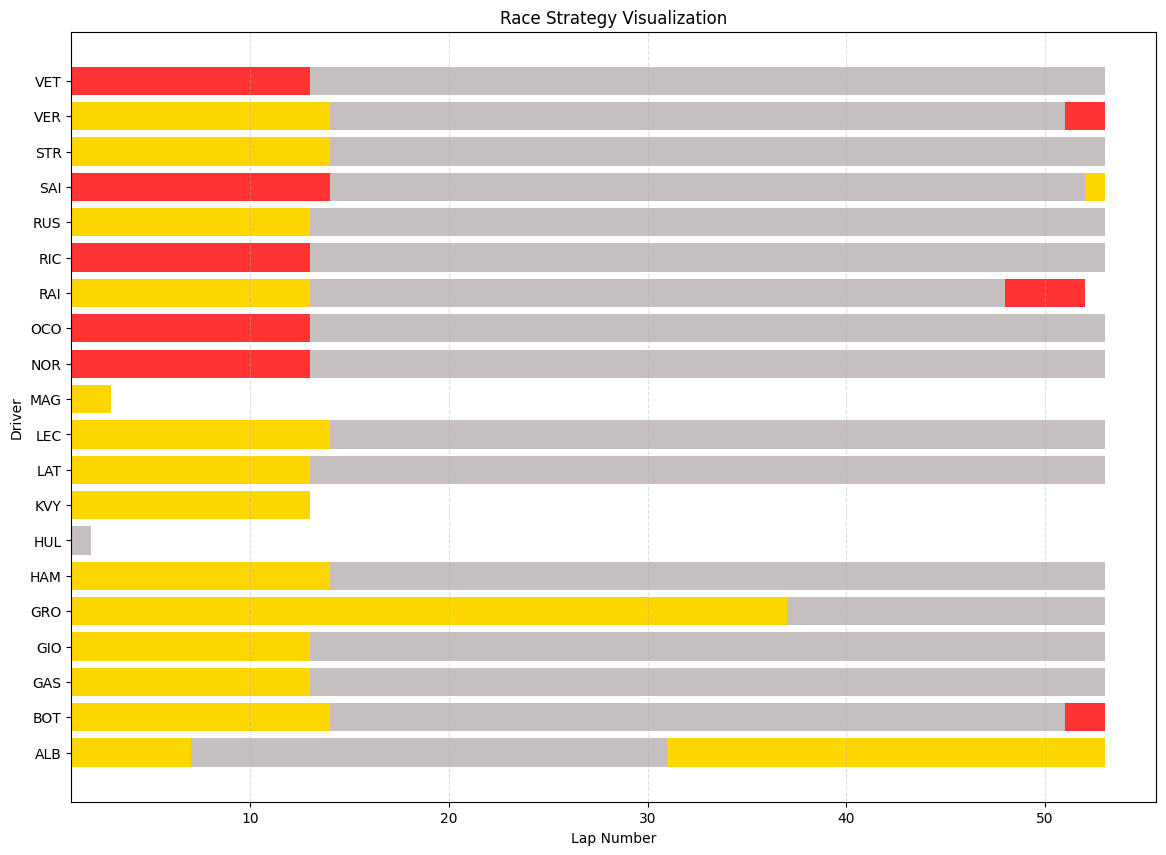

In [7]:
drivers = laps['Driver'].unique()

fig, ax = plt.subplots(figsize=(14,10))

for driver in drivers:
    stints = laps[laps['Driver'] == driver].groupby('Stint')
    
    for stint, data in stints:
        compound = data['Compound'].iloc[0]
        ax.barh(
            driver,
            len(data),
            left=data['LapNumber'].min(),
            color=COMPOUND_COLORS.get(compound, '#AAAAAA')
        )

ax.set_xlabel("Lap Number")
ax.set_ylabel("Driver")
ax.set_title("Race Strategy Visualization")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()
